In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
import scipy.integrate as integrate
import scipy.optimize as opt
import matplotlib.animation as anime
#data array

#burrell data
Experimental = np.array(
                #burrell
                [('burrell', 'C40+ optical', 99.99, 145, 1.168, 1), ('benhelm', 'C40+ optical', 99.925, 3000, 1.168, 1), ('myerson', 'C40+ optical', 99.991, 145, 1.168, 1),],

            #fidelity the average is for the two states (burrell)
            dtype=[('author', np.string_), ('ion', np.string_), ('fidelity', 'float'), ('readout time(us)', 'float'), ('coherence T1(s)', 'U8'), ('coherence T2(ms)','U8')])

print(Experimental)

[(b'', b'', 99.99 ,  145., '1.168', '1')
 (b'', b'', 99.925, 3000., '1.168', '1')
 (b'', b'', 99.991,  145., '1.168', '1')]


In [15]:
'''In general, the rates for pumping between the qubit states will not be zero. For the
calcium optical qubit the |B〉→|D〉 pumping rate remains negligible (section 4.3.3), but
the rate of |D〉→|B〉pumping due to decay from the metastable D5/2 state is appreciable
at 1/τ where τ = 1.168(7) s is the average lifetime of the shelf state [138].
The count distribution B0(n) for trials prepared in the |B〉 state remains Poisson 
distributed with mean (RB + RD)tb, but the distribution for trials initially prepared in
the |D〉 state is modified to contain two terms:'''

'In general, the rates for pumping between the qubit states will not be zero. For the\ncalcium optical qubit the |B〉→|D〉 pumping rate remains negligible (section 4.3.3), but\nthe rate of |D〉→|B〉pumping due to decay from the metastable D5/2 state is appreciable\nat 1/τ where τ = 1.168(7) s is the average lifetime of the shelf state [138].\nThe count distribution B0(n) for trials prepared in the |B〉 state remains Poisson \ndistributed with mean (RB + RD)tb, but the distribution for trials initially prepared in\nthe |D〉 state is modified to contain two terms:'

In [16]:
'''The number of counts n recorded in tb when an ion decays at a time t is Poisson distributed with mean λ(t)'''

#functions

def Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def Dmean(RD, tb):
    x = RD*tb
    return x

def Bo(N, Bmean):
    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / spec.factorial(N)
    return x    

def Do(Dmean,N,RB,RD,tb,tau):
    x = (np.e**(-tb/tau) * ((Dmean)**N) * (np.exp(Dmean)) / spec.factorial(N)) + Xo(N,RB,RD,tb,tau)
    return x

def X_integrand(l,n,RB,RD,tau,tb):
    return (1/(RB*tau))*np.exp((l-((RD+RB)*tb))/(RB*tau))*np.power(l,n)*np.exp(-l)/spec.factorial(n)

def Xo(N,RB,RD,tb,tau):
    X0 = []
    for n in N:
        X0 = np.append(X0, (integrate.quad(X_integrand, RD*tb, (RB+RD)*tb, args=(n,RB,RD,tau,tb)))[0])
    return X0




Text(0.5, 1.0, 'Count Probability in a Given State')

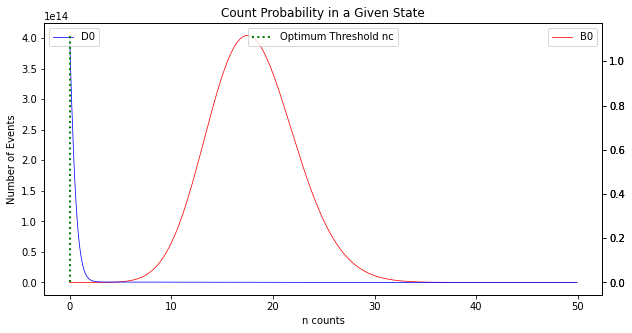

In [17]:
#Variables

#Burrell quoted
#RB = 55800 s−1
#RD = 442 s−1
#tb = 420 us = .00042
#n = counts
#nc = diferentiation counts

n = 50

#Bright state fluoresence rate
Rb = 55800
#Dark state fluoresence rate
Rd = 442
#bin time
tb = .00032

#tau is ?
tau = .01
# 0 <= t < tb time where ion decays
t = tb/2
l = Rd*tb+(Rb*(tb-t))

step = .1
N = np.arange(start=0,stop=n,step=step)

#Graphing
Bmean = Bmean(Rb,Rd,tb)
BM = np.full(np.int_(n/step),Bmean)
Dmean = Dmean(Rd,tb)
DM = np.full(np.int_(n/step),Dmean)

#n counts in tb from bright
B0 = Bo(N,BM)

#n counts in tb from dark
D0 = Do(Dmean,N,Rb,Rd,tb,tau)

#count threshold
nc = 0
#minDiff = B0[0]-D0[0]
#for i, item in enumerate(B0):
#    diff = B0[i]-D0[i]
#    if(diff<minDiff):
#        print(nc)
#        nc = i
#        minDiff = diff
#print(B0)
#print(D0)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Number of Events")
ax1.set_xlabel("n counts")
ax2 = plt.twinx(ax1)
ax2.plot(N, D0, lw=0.75, c="b", label = "D0")
ax3 = plt.twinx(ax1)
plt.vlines(nc, ymin=0, ymax=np.max(D0), colors='green', ls=':', lw=2, label='Optimum Threshold nc')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')
ax3.legend(loc = 'upper center')
plt.title("Count Probability in a Given State")

Text(0.5, 1.0, 'Dark and Bright Errors with Pumping')

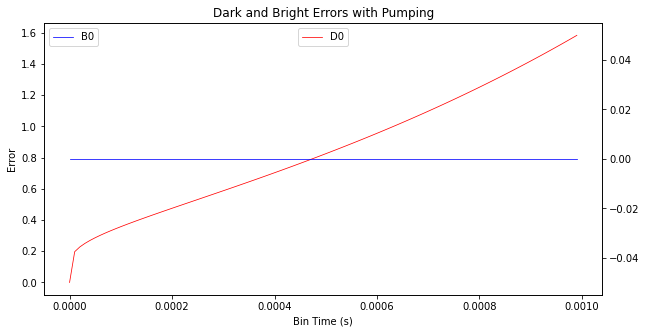

In [18]:
#Optimal Time vs Collection Efficiency

#Integrate under the curves to find the error
#Plot error vs tb

Rb = 55800
Rd = 442

def D_integrand(n, Rd, tb):
    return (np.power(Rd*tb,n)) * (np.exp(Rd*tb)) / spec.factorial(n)
    
#nc to inf w/ D0
def ed(tb): 
    return integrate.quad(D_integrand, nc, np.inf, args=(Rd, tb))

def B_integrand(n, Rb, Rd, tb):
    return (np.power((Rb+Rd)*tb,n)) * (np.exp((Rb+Rd)*tb)) / spec.factorial(n)

#0 to nc w/ B0
def eb(tb):
    return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))

#print(ed(.00032))
#print(eb(.00032))

tb = np.arange(start=0,stop=.001,step=.00001)
#print(tb)

darkE = np.empty(0)
brightE = np.empty(0)

for i in tb:
    darkE = np.append(darkE, ed(i)[0])
for i in tb:
    brightE = np.append(brightE, eb(i)[0])

#print(darkE)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(tb, darkE, lw=0.75, c="r", label = "D0")
ax1.set_ylabel("Error")
ax1.set_xlabel("Bin Time (s)")
ax2 = plt.twinx(ax1)
ax2.plot(tb, brightE, lw=0.75, c="b", label = "B0")
ax1.legend(loc = 'upper center')
ax2.legend(loc = 'upper left')

plt.title("Dark and Bright Errors with Pumping")